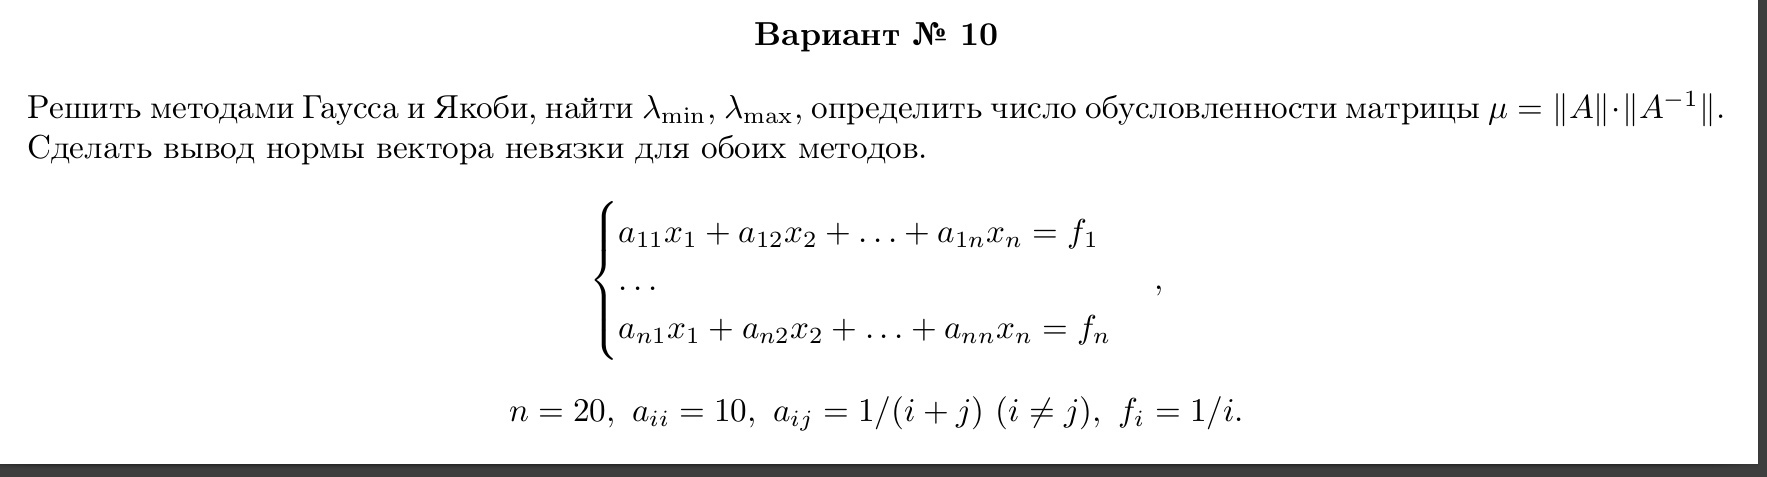

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [20]:
n = 20
A = np.zeros((n,n),dtype=np.float)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i == j:
            A[i][j] = 10
        else:
            A[i][j]= round(1/(i+j+2),2)
f = np.zeros((n,1))
for i in range(n):
    f[i][0] = 1/(i+1)#round(1/(i+1),1)
#print(A)

In [22]:
def lambda1(ans,A):
    e = 10 ** (-3)
    pogr  = 10 ** 8
    it = 0
    while pogr > e:
        ans0 = ans
        ans1 = np.dot(A,ans0)
        #print(ans1)
        l = sum(ans1 * ans0) / sum(ans0 * ans0)
        #lambdmax = np.inner(ans1,ans0) / np.inner(ans0,ans0)
        pogr = np.linalg.norm(ans0-ans1)
        it += 1
        if it == 10:
            break
    print(it)
    return l
lambda1(np.ones((n)),A)

10


11.129000000000001

In [18]:
def matrix_L(A):
    L= np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            L[i][j] = A[i][j]
    return L

def matrix_D(A):
    D= np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i == j:
                D[i][j] =  A[i][j]
    return D

def matrix_R(A, D, L):
    R= np.zeros((n,n))
    R = A - L - D
    return R

def Jackobi(L, D, R):
    ans = np.zeros((n,1))
    e = 10 ** (-4)
    pogr  = 10 ** 8
    it = 0
    while pogr > e:
        ans2 = ans
        ans = np.dot(np.dot(-inv(D),(L+R)),ans) + np.dot(inv(D),f)
        s = 0
        for i in range(n):
            s+=ans[i][0] - ans2 [i][0]
        pogr = abs(s / n)
        it += 1
    print(it)
    return ans

In [4]:
def DivideRow(A, B, row, divider):
    if divider != 0:
        A[row,] /= divider
        B[row,0] /= divider
        #A[row] = [a / divider for a in A[row]]
    #print("\n",A)
        
def SwapRows(A, B, row1, row2):
    A[[row1,row2]] = A[[row2,row1]]
    B[[row1,0]] = B[[row2,0]]
    #print("\n",A)
    
def CombineRows(A, B, row, destination_row, weight):
    for i in range(n):
        A[destination_row,i] += weight*A[row,i]
    B[destination_row,0] += weight*B[row,0]
    #print("\n",A)

def matrix_to_triangle_view(A,B):
    for i in range(n):
        maximum = A[i,i]
        maxstr = i
        for j in range(i+1,n):
            if maximum < A[j,i]: 
                maxstr = j
        if maxstr != i:
            SwapRows(A,B,i,maxstr)
        DivideRow(A,B,maxstr,A[maxstr][i])
        for j in range(i+1,n):
            if A[j][i] != 0:
                DivideRow(A,B,j,A[j][i])
                CombineRows(A,B,maxstr,j,-1)
        
def matrix_reversed_solving(A,B):
    ANS = [B[n-1,0]/A[n-1,n-1]]
    cnt = 0
    #print(B[n-1,0],A[n-1,n-1],ANS)
    for i in range(n-2,-1,-1):
        partial_sum = 0
        t = 0
        for j in range(n-1,n-(len(ANS)+1),-1):
            partial_sum += A[i][j] * ANS[t]
            t += 1
        b1 = B[i,0]
        delim = A[i][j-1]
        ANS.append((B[i,0]-partial_sum)/A[i][j-1])
        cnt += 1
    #lost = (B[0,0]-partial_sum-ANS[len(ANS)-1]*A[0,1])/A[0][0]  #баг - непонятно, почему теряется одно значение
    #ANS.append(lost)
    return np.flipud(np.array(ANS))


def Gaussian_method(A,B):
    matrix_to_triangle_view(A,B)
    return matrix_reversed_solving(A,B)

In [5]:
def mu(A):
    max1 = 0
    for i in range (len(A)):
        sum = 0
        for j in range(len(A)):
            sum += abs(A[i][j])
        if(max1 < sum):
            max1 = sum
    A_inv = inv(A)
    max2 = 0
    for i in range (len(A_inv)):
        sum = 0
        for j in range(len(A_inv)):
            sum += abs(A_inv[i][j])
        if(max2 < sum):
            max2 = sum
    return (max1*max2)

def nevyazka(x):
    temp = np.zeros((n, 1))
    r = np.zeros((n, 1))
    for i in range(len(A)):
        temp[i] = 0
        for j in range(len(A)):
            temp[i] += x[j] * A[i][j]
        r[i] = temp[i] - f[i]
    return r

def norm(x):
    ss=0
    for i in range(len(x)):
        ss = ss + x[i]**2
    return np.math.sqrt(ss)

In [6]:
muu = mu(A)
print(muu)

1.4514071831556932


In [19]:
ansGaussian = Gaussian_method(A,f)
ansJackobi = Jackobi(matrix_L(A), matrix_D(A), matrix_R(A, matrix_D(A), matrix_L(A)))
print(ansGaussian)
print(ansJackobi.reshape(n))

3
[0.09617495 0.04481786 0.02876061 0.02100881 0.01649013 0.01358665
 0.01151237 0.00993209 0.00875081 0.00782046 0.00706955 0.006391
 0.00589905 0.00542282 0.0050727  0.00470109 0.00439733 0.00418964
 0.00392528 0.00369895]
[0.09617913 0.04481948 0.02876138 0.02100923 0.01649038 0.0135868
 0.01151246 0.00993214 0.00875084 0.00782048 0.00706956 0.006391
 0.00589905 0.00542283 0.0050727  0.00470109 0.00439733 0.00418964
 0.00392528 0.00369895]


In [18]:
print(norm(nevyazka(ansGaussian)),np.linalg.norm(nevyazka(ansGaussian)))
print(norm(nevyazka(ansJackobi)),np.linalg.norm(nevyazka(ansJackobi)))

1.758414154971162e-17 1.758414154971162e-17
1.758414154971162e-17 1.758414154971162e-17


In [11]:
print(np.linalg.solve(A,f).reshape(n))

[0.09617495 0.04481786 0.02876061 0.02100881 0.01649013 0.01358665
 0.01151237 0.00993209 0.00875081 0.00782046 0.00706955 0.006391
 0.00589905 0.00542282 0.0050727  0.00470109 0.00439733 0.00418964
 0.00392528 0.00369895]


In [12]:
print(Gaussian_method(A,f).round(10)==list(np.linalg.solve(A,f).reshape(n).round(10)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [ ]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

n = 20
A = np.zeros((n,n),dtype=np.float)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i == j:
            A[i][j] = 10
        else:
            A[i][j]= round(1/(i+j+2),2)
f = np.zeros((n,1))
for i in range(n):
    f[i][0] = 1/(i+1)#round(1/(i+1),1)
#print(A)

def lambda1(ans,A):
    e = 10 ** (-10)
    pogr  = 10 ** 8
    it = 0
    while pogr > e:
        ans0 = np.copy(ans)
        ans = np.dot(A,ans)
        #ans = ans1
        print(ans0,ans)
        #print(ans1)
        l = sum(ans * ans0) / sum(ans0 * ans0)
        #lambdmax = np.inner(ans1,ans0) / np.inner(ans0,ans0)
        pogr = 1/np.linalg.norm(ans-ans0)
        print(pogr)
        it += 1
        if it == 10:
            break
    print(it)
    return l
print(lambda1(np.ones((n)),inv(A)))
print((np.linalg.eig(A)[0]))